# PyTorch Custom Data Creation (from Food101)

Making a dataset to use with pytorch model.

Going to leverage the fact that PyTorch now incorporates Food101.

I'll Get the images for 3 classes: Pizza, Steak, Sushi and store them in their respective files.

In [1]:
import torch 
import torchvision 

import torchvision.datasets as datasets 
import torchvision.transforms as transforms 

# Setup data directory 
import pathlib 
data_dir = pathlib.Path('../data')

In [2]:
data_dir

WindowsPath('../data')

## Downlaod data 

Get the Food101 dataset from Pytorch

In [4]:
# Get training data 
train_data = datasets.Food101(root=data_dir,
                             split='train',
                             download=True)

# Get testing data 
test_data = datasets.Food101(root=data_dir,
                            split='test',
                            download=True)

100%|█████████████████████████████████████████████████████████████████████████████| 5.00G/5.00G [35:06<00:00, 2.37MB/s]


Extracting ..\data\food-101.tar.gz to ..\data


In [5]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ..\data
    split=train

In [6]:
class_names = train_data.classes 
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

churros


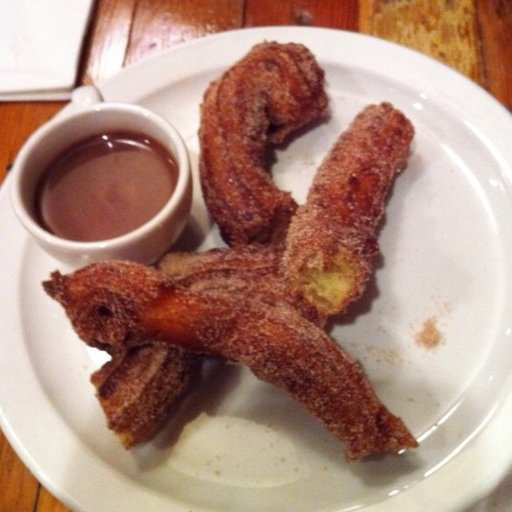

In [7]:
# View first sample (PIL Image format)
print(class_names[train_data[0][1]])
train_data[0][0]

## Find subset of appropriate classes 
Want: Steak, pizza, sushi.

Current path setup:
    ../data/food-101/images/CLASS_NAME/IMAGES.jpg

Going to get a list of the different target images classes (pizza, steak, sushi) filenames and them copy the images to seperate folders.

In [8]:
import random 

# Setup data paths 
data_path = data_dir / 'food-101'/ 'images'
target_classes = ['pizza', 'steak', 'sushi']

amount_to_get = 0.99 

# Create function to seperate a random amount of data 
def get_subset(image_path=data_path,
              data_splits=['train', 'test'],
              target_classes=['pizza', 'steak', 'sushi'],
               amount=0.1,
               seed=42
              ):
    random.seed(seed)
    label_splits = {}

    # Get labels 
    for data_split in data_splits:
        print(f'[INFO] Creating image split for: {data_split}...')
        label_path = data_dir / 'food-101' / 'meta'/ f'{data_split}.txt'
        with open(label_path, 'r') as f:
            labels = [line.strip("\n") for line in f.readlines() if line.split("/")[0] in target_classes] 
        
        # Get random subset of target classes image ID's
        number_to_sample = round(amount * len(labels))
        print(f"[INFO] Getting random subset of {number_to_sample} images for {data_split}...")
        sampled_images = random.sample(labels, k=number_to_sample)
        
        # Apply full paths
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths
    return label_splits
        
label_splits = get_subset(amount=amount_to_get)
label_splits["train"][:10]
            
    

[INFO] Creating image split for: train...
[INFO] Getting random subset of 2228 images for train...
[INFO] Creating image split for: test...
[INFO] Getting random subset of 742 images for test...


[WindowsPath('../data/food-101/images/pizza/3269634.jpg'),
 WindowsPath('../data/food-101/images/pizza/1524655.jpg'),
 WindowsPath('../data/food-101/images/steak/2825100.jpg'),
 WindowsPath('../data/food-101/images/steak/225990.jpg'),
 WindowsPath('../data/food-101/images/steak/1839481.jpg'),
 WindowsPath('../data/food-101/images/pizza/38349.jpg'),
 WindowsPath('../data/food-101/images/pizza/3018077.jpg'),
 WindowsPath('../data/food-101/images/sushi/93139.jpg'),
 WindowsPath('../data/food-101/images/pizza/2702825.jpg'),
 WindowsPath('../data/food-101/images/sushi/200025.jpg')]

## Move training and testing images to dedicated folders

In [9]:
# Create target directory path
target_dir_name = f"../data/pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../data/pizza_steak_sushi_99_percent'


In [10]:

import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ..\data\food-101\images\pizza\3269634.jpg to ..\data\pizza_steak_sushi_99_percent\train\pizza\3269634.jpg...
[INFO] Copying ..\data\food-101\images\pizza\1524655.jpg to ..\data\pizza_steak_sushi_99_percent\train\pizza\1524655.jpg...
[INFO] Copying ..\data\food-101\images\steak\2825100.jpg to ..\data\pizza_steak_sushi_99_percent\train\steak\2825100.jpg...
[INFO] Copying ..\data\food-101\images\steak\225990.jpg to ..\data\pizza_steak_sushi_99_percent\train\steak\225990.jpg...
[INFO] Copying ..\data\food-101\images\steak\1839481.jpg to ..\data\pizza_steak_sushi_99_percent\train\steak\1839481.jpg...
[INFO] Copying ..\data\food-101\images\pizza\38349.jpg to ..\data\pizza_steak_sushi_99_percent\train\pizza\38349.jpg...
[INFO] Copying ..\data\food-101\images\pizza\3018077.jpg to ..\data\pizza_steak_sushi_99_percent\train\pizza\3018077.jpg...
[INFO] Copying ..\data\food-101\images\sushi\93139.jpg to ..\data\pizza_steak_sushi_99_percent\train\sushi\93139.jpg...
[INFO] Copying ..\

In [11]:
# Check lengths of directories
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  import os
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
walk_through_dir(target_dir)

There are 2 directories and 0 images in '..\data\pizza_steak_sushi_99_percent'.
There are 3 directories and 0 images in '..\data\pizza_steak_sushi_99_percent\test'.
There are 0 directories and 245 images in '..\data\pizza_steak_sushi_99_percent\test\pizza'.
There are 0 directories and 248 images in '..\data\pizza_steak_sushi_99_percent\test\steak'.
There are 0 directories and 249 images in '..\data\pizza_steak_sushi_99_percent\test\sushi'.
There are 3 directories and 0 images in '..\data\pizza_steak_sushi_99_percent\train'.
There are 0 directories and 744 images in '..\data\pizza_steak_sushi_99_percent\train\pizza'.
There are 0 directories and 742 images in '..\data\pizza_steak_sushi_99_percent\train\steak'.
There are 0 directories and 742 images in '..\data\pizza_steak_sushi_99_percent\train\sushi'.


## Zip up images folder to be more easily transported

In [12]:
# Zip pizza_steak_sushi images
zip_file_name = data_dir / f"pizza_steak_sushi_{str(int(amount_to_get*100))}_percent"
shutil.make_archive(zip_file_name, 
                    format="zip", 
                    root_dir=target_dir)

'C:\\Users\\yashs\\food_classifier\\food-classifier-webapp\\data\\pizza_steak_sushi_99_percent.zip'